In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
heart_df =  pd.read_table("heart.dat", sep="\s+")
heart_df.head()
heart_dfx = heart_df.iloc[:,:13]
heart_dfy = heart_df.iloc[:,13:14]


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaled_Xtrain = scaler.fit_transform(heart_dfx)

X_train,X_test,Y_train,Y_test = train_test_split(scaled_Xtrain, heart_dfy, train_size=0.70,stratify=heart_dfy)

KNeighborsClassifier(n_neighbors=20)

0.8246088193456614
Résultats de validation sur l'ensemble des paramètres: 

0.756 (+/-0.129) for {'n_neighbors': 1}
0.820 (+/-0.115) for {'n_neighbors': 5}
0.819 (+/-0.038) for {'n_neighbors': 10}
0.819 (+/-0.038) for {'n_neighbors': 15}
0.825 (+/-0.062) for {'n_neighbors': 20}
0.819 (+/-0.061) for {'n_neighbors': 25}

              precision    recall  f1-score   support

           1       0.84      0.96      0.90        45
           2       0.93      0.78      0.85        36

    accuracy                           0.88        81
   macro avg       0.89      0.87      0.87        81
weighted avg       0.88      0.88      0.87        81

Matrice de confusion: 




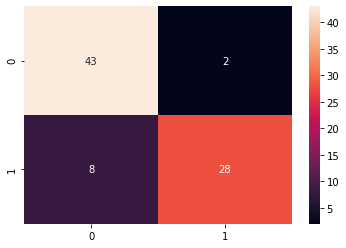

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

params = {"n_neighbors": [1,5,10,15,20,25]}
clf = GridSearchCV(KNeighborsClassifier(),params,cv=5, scoring="accuracy")
clf.fit(X_train, Y_train.values.ravel())
print(clf.best_estimator_)
print()
print(clf.best_score_)

print("Résultats de validation sur l'ensemble des paramètres: ")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()    

y_pred = clf.best_estimator_.predict(X_test)
print(classification_report(Y_test, y_pred))

print("Matrice de confusion: ")
print()       
y_pred = clf.best_estimator_.predict(X_test)
cf_matrix_test = confusion_matrix(Y_test, y_pred)
sns.heatmap(cf_matrix_test, annot=True)
print()